# This is Double DQN for Cartpole

In [1]:
import random
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
import gym
# from settings import PROJECT_ROOT

Using TensorFlow backend.


In [2]:
class DDQNA:
    def __init__(self, state_size, action_size):
        self.state = state_size
        self.action = action_size
        self.store_data = deque(maxlen=200000)
        print(self.store_data)
        self.gamma = 0.995    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.001
        self.epsilon_decay = 0.995
        self.learning_rate = 0.01
        self.nn_model = self.neural_net()
        self.target_nn = self.neural_net()
        self.ed = []
        self.target_nn.set_weights(self.nn_model.get_weights())
        self.counter = 0

    def act(self, state):
        rand_var = np.random.rand()
        if rand_var <= self.epsilon:
            return random.randrange(self.action)
        action_v = self.nn_model.predict(state)
#         print("action_v",action_v)
        return np.argmax(action_v[0]) 
    
    def neural_net(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(64, input_dim = self.state, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(self.action, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        
#         if os.path.isfile(FILE):
#             print("Model Load")
#             self.load(FILE)
#             self.exp = self.exp_min
            
        return model

    def store(self, state, action, reward, next_state, done):
        self.store_data.append((state, action, reward, next_state, done))
#         print("Stored_data", self.store_data)
    
    def q_values(self, next_state, reward): 
    #         print(next_state)
        action1 = np.argmax(self.nn_model.predict(next_state)[0])
        q_update = self.target_nn.predict(next_state)[0][action1]
        q_update = self.gamma * q_update
        q_update = reward + q_update
#         self.counter += 1 
#         print(self.counter)
        return q_update
        
    def replay(self, batch_size):
        sample_data = random.sample(self.store_data, batch_size)
#         sample_data = sample(range(self.store_data), batch_size)
        if len(self.store_data) < batch_size: 
            return
        for state, action, reward, next_state, done in sample_data:
            if done:
                q_update = reward
            if not done:
                q_update = self.q_values(next_state, reward)
            q_val = self.nn_model.predict(state)
#             print("q_val",q_val)
            q_val[0][action] = q_update
#             print("q_update",q_update)
            self.nn_model.fit(state, q_val, batch_size = batch_size, epochs=1, verbose=0)
        self.counter += 1
        self.ed.append(self.epsilon)
        self.epsilon *= self.epsilon_decay
        self.epsilon = max(self.epsilon_min, self.epsilon)
        if self.counter == 15:
            self.target_nn.set_weights(self.nn_model.get_weights())
            print("updating")
            self.counter = 0

    def save(self, name):
        self.model.save_weights(name)

4
2
deque([], maxlen=200000)
Mean 42.0
Ep 1/2000# Score:42.0
Mean 39.0
Ep 2/2000# Score:36.0
Mean 34.0
Ep 3/2000# Score:24.0
Mean 34.5
Ep 4/2000# Score:36.0
Mean 36.8
Ep 5/2000# Score:46.0
Mean 43.333333333333336
Ep 6/2000# Score:76.0
Mean 56.57142857142857
Ep 7/2000# Score:136.0
Mean 55.0
Ep 8/2000# Score:44.0
Mean 52.666666666666664
Ep 9/2000# Score:34.0
Mean 51.8
Ep 10/2000# Score:44.0
Mean 52.54545454545455
Ep 11/2000# Score:60.0
Mean 51.5
Ep 12/2000# Score:40.0
Mean 48.92307692307692
Ep 13/2000# Score:18.0
Mean 47.42857142857143
Ep 14/2000# Score:28.0
updating
Mean 46.666666666666664
Ep 15/2000# Score:36.0
Mean 47.875
Ep 16/2000# Score:66.0
Mean 51.529411764705884
Ep 17/2000# Score:110.0
Mean 49.77777777777778
Ep 18/2000# Score:20.0
Mean 50.421052631578945
Ep 19/2000# Score:62.0
Mean 48.7
Ep 20/2000# Score:16.0
Mean 48.57142857142857
Ep 21/2000# Score:46.0
Mean 47.54545454545455
Ep 22/2000# Score:26.0
Mean 46.869565217391305
Ep 23/2000# Score:32.0
Mean 48.083333333333336
Ep 24/200

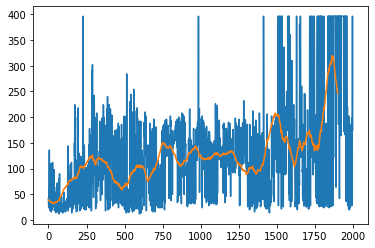

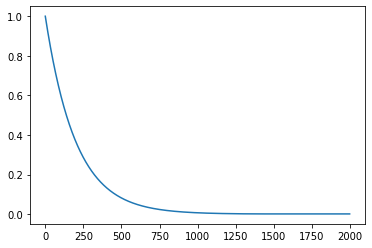

In [8]:
####################################  Cartpole #################################################################################
Episods = 2000
Rec_score = 195
env = gym.make('CartPole-v0')
obs_size = env.observation_space.shape[0]
print(obs_size)
action_size = env.action_space.n
print(action_size)
pole = DDQNA(obs_size, action_size)
batch_size = 20
score = 0
com_score = []
ep = []
tmp = deque(maxlen = 100)
for epi in range(1, Episods): 
    state = env.reset()
    score = 0
#     print(state)
    state = np.reshape(state, [1, obs_size])
#     print(state)
    for i in range(1000):
#         env.render()
        action = pole.act(state)
        next_state, reward,done,info = env.step(action)
        next_state = np.reshape(next_state, [1,obs_size])
        if not done: 
            reward = reward
        if done:
            reward = -reward
        score = score + reward
        pole.store(state,action,reward,next_state, done)
        state = next_state
#         print(reward)
        score = score + reward
        if done == True:  
            break
#     time.sleep(1)
#     env.close()
    com_score.append(score)
    tmp.append(score)
    if epi > 99: 
        ep.append(np.mean(tmp))
    pole.replay(batch_size)
    print("Mean", np.mean(tmp))
    if (np.mean(tmp) > Rec_score): 
        print("solved at episode: ", epi," with avg: ", np.mean(tmp))
    print("Ep {}/{}# Score:{}".format(epi, Episods, score))
#     epi += 1 
fig = plt.figure(1)
plt.clf()
plt.plot(com_score)
plt.plot(ep)
plt.show()
fig = plt.figure(2)
plt.plot(pole.ed)